# Imports

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
warnings.filterwarnings('ignore')
%matplotlib inline

# Data Loading

In [2]:
df=pd.read_csv('/content/Breast_cancer_data.csv')
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


# Expolartory Data Analysis(EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [4]:
df.isnull().sum()

,0
mean_radius,0
mean_texture,0
mean_perimeter,0
mean_area,0
mean_smoothness,0
diagnosis,0


<Axes: >

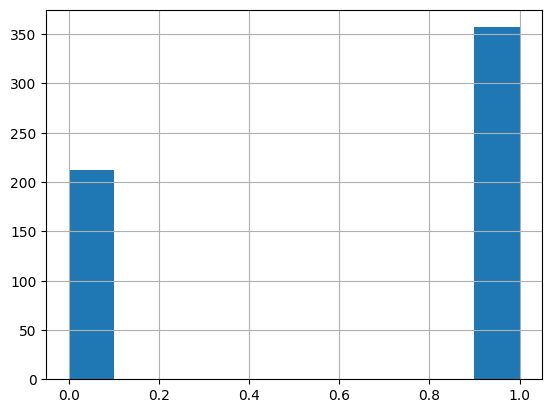

In [5]:
df['diagnosis'].hist()

<Axes: >

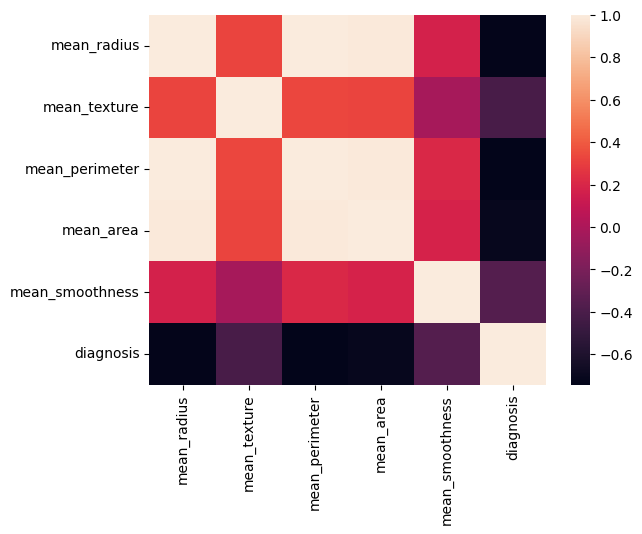

In [6]:
sns.heatmap(df.corr())

# Model Training

In [37]:
class NaiveBayes:
  def fit(self,x,y):
    n_samples,n_features=x.shape
    self._classes=np.unique(y)
    n_classes=len(self._classes)

    self._mean=np.zeros((n_classes,n_features),dtype=np.float64)
    self._var=np.zeros((n_classes,n_features),dtype=np.float64)
    self._priors=np.zeros(n_classes,dtype=np.float64)
    for idx,c in enumerate(self._classes):
      x_class=x[y==c]
      self._mean[idx,:]=x_class.mean(axis=0)
      self._var[idx,:]=x_class.var(axis=0)
      self._priors[idx]=x_class.shape[0]/float(n_samples)
    # print(self._priors)

  def predict(self,x):
    y_pred=[self._predict(i) for i in x]
    return y_pred

  def _predict(self,x):
    poster=[]
    for idx,c in enumerate(self._classes):
      prior=np.log(self._priors[idx])
      posterior=np.sum(np.log(self._pdf(idx,x)))
      posterior+=prior
      poster.append(posterior)
    return self._classes[np.argmax(poster)]

  def _pdf(self,idx,x):
    mean=self._mean[idx]
    var=self._var[idx]
    num=np.exp(-((x-mean)**2)/(2*var))
    deno=np.sqrt(2*np.pi*var)
    return num/deno

In [9]:
x=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [30]:
nb=NaiveBayes()
nb.fit(x_train,y_train)

# Testing

In [31]:
y_pred=nb.predict(x_train)
score=accuracy_score(y_train,y_pred)
cm=confusion_matrix(y_train,y_pred)
print(score)
print(cm)
print(classification_report(y_train,y_pred))

0.8967032967032967
[[132  37]
 [ 10 276]]
              precision    recall  f1-score   support

           0       0.93      0.78      0.85       169
           1       0.88      0.97      0.92       286

    accuracy                           0.90       455
   macro avg       0.91      0.87      0.89       455
weighted avg       0.90      0.90      0.89       455



In [32]:
y_pred=nb.predict(x_test)
score=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
print(score)
print(cm)
print(classification_report(y_test,y_pred))

0.9473684210526315
[[37  6]
 [ 0 71]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.93        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



# Direct Method

In [34]:
gb=GaussianNB()
gb.fit(x_train,y_train)

GaussianNB()

In [35]:
y_pred=gb.predict(x_train)
score=accuracy_score(y_train,y_pred)
cm=confusion_matrix(y_train,y_pred)
print(score)
print(cm)
print(classification_report(y_train,y_pred))

0.8967032967032967
[[132  37]
 [ 10 276]]
              precision    recall  f1-score   support

           0       0.93      0.78      0.85       169
           1       0.88      0.97      0.92       286

    accuracy                           0.90       455
   macro avg       0.91      0.87      0.89       455
weighted avg       0.90      0.90      0.89       455



In [36]:
y_pred=gb.predict(x_test)
score=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
print(score)
print(cm)
print(classification_report(y_test,y_pred))

0.9473684210526315
[[37  6]
 [ 0 71]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.93        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

